<a href="https://colab.research.google.com/github/SobolMaria/goit-ds-hw-09/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
df1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/goit/module_9/data_2d.csv", header=None)
df1

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218
...,...,...,...
195,1.0,0.629144,4.378584
196,1.0,-0.723824,5.361801
197,1.0,1.346107,2.333476
198,1.0,3.608219,3.411546


In [61]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

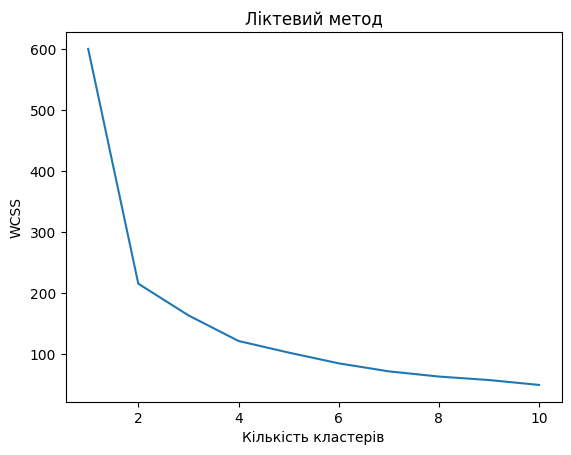

In [62]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Ліктевий метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

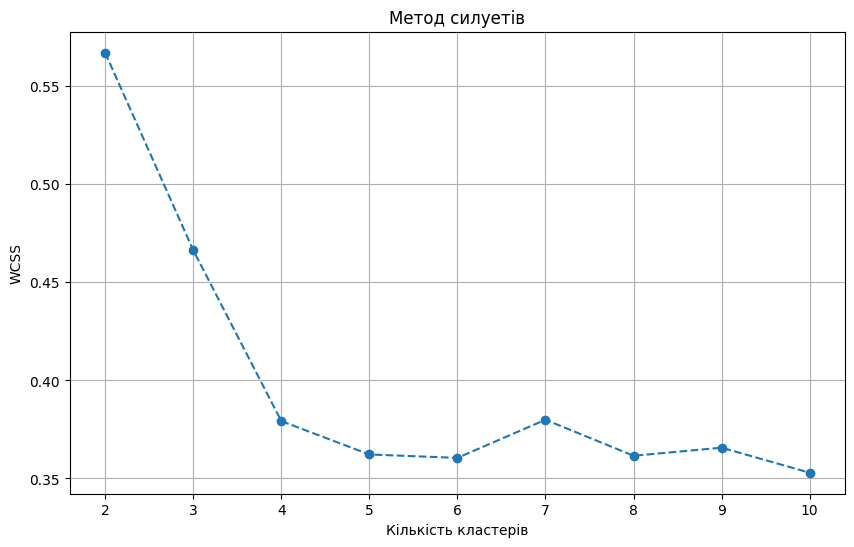

In [63]:
silhouette_scores = []
for i in range(2, 11):  # Для методу силуетів потрібно мінімум 2 кластери
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(df1_scaled)
    silhouette_avg = silhouette_score(df1_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Візуалізація графіка методу силуетів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Отже, кількість кластерів: 2

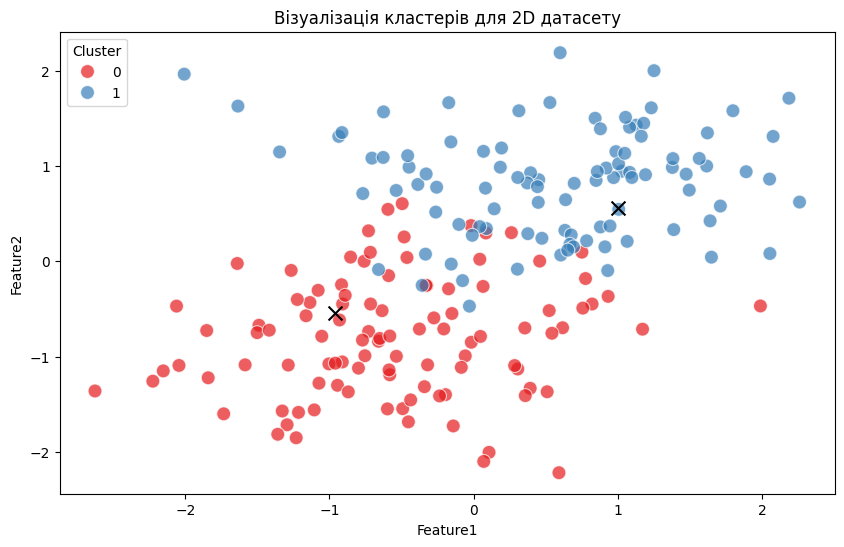

In [64]:
import seaborn as sns
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df1_scaled)

df_vis = pd.DataFrame(df1_scaled, columns=['Feature0', 'Feature1', 'Feature2'])
df_vis['Cluster'] = clusters

centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', palette='Set1', data=df_vis, s=100, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')
plt.title('Візуалізація кластерів для 2D датасету')
plt.show()

In [65]:
df2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/goit/module_9/mnist.csv", header=None)
df2

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_train, X_test = train_test_split(df2, test_size=0.3, random_state=42)

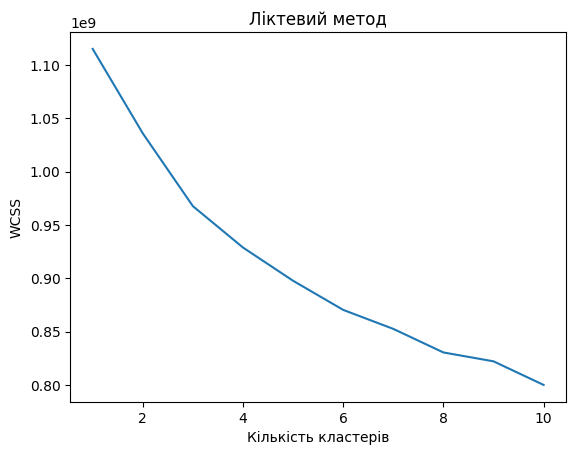

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Ліктевий метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

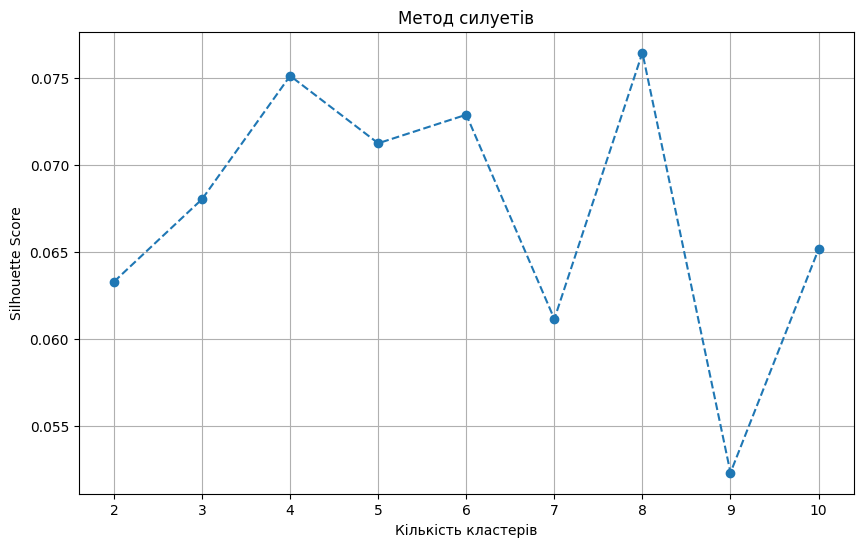

In [69]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Отже, як видно з графіку візьмемо 8 кластерів

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

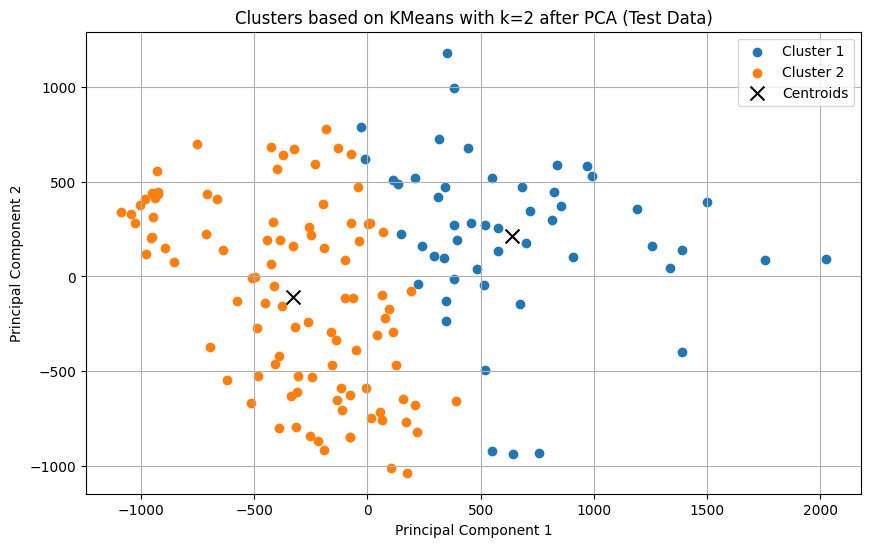

In [71]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_test_pca)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 6. Візуалізація кластерів після PCA
plt.figure(figsize=(10, 6))

# Оскільки у вас 2 кластери, виводимо їх
for i in range(2):  # Змінено з 4 на 2, так як ми маємо лише 2 кластери
    plt.scatter(X_test_pca[cluster_labels == i, 0], X_test_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')

# Відображення центроїдів кластерів
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='k', s=100, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters based on KMeans with k=2 after PCA (Test Data)')
plt.legend()
plt.grid(True)
plt.show()